#Cardiovascular Disease

Presented by Emilia el Khoury

##Import the required libraries:

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load the dataset into a Pandas DataFrame:

In [ ]:
#read the data
df= pd.read_csv('/content/cardio_train.csv', delimiter=';')

##Get an overview of the data:

In [ ]:
# Display the first few rows of the dataset
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Check the dimensions of the dataset (rows, columns)
print(df.shape)

(70000, 13)


In [ ]:
# View summary statistics of the numerical columns
print(df.describe())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [ ]:
# Check the data types of each column
print(df.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


##Handle missing values:

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [ ]:
#Remove the ID column
df = df.drop("id", axis=1)

##EDA

###Gender

In [ ]:
#Count of the gender
gender_counts = df['gender'].value_counts()
print(gender_counts)

1    45113
2    24272
Name: gender, dtype: int64


In [ ]:
#Percentage of each gender
gender_percentages = df['gender'].value_counts(normalize=True) * 100
print(gender_percentages)

1    65.042857
2    34.957143
Name: gender, dtype: float64


1.   Represent the female
2.   Represent the male

###Weight

In [ ]:
# View summary statistics of the numerical columns
print(df['weight'].describe())

count    69385.000000
mean        74.227070
std         14.315398
min         40.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64


In [ ]:
# Assuming the dataframe is called "df" and the column is "weight"
column = df['weight']

# Calculate the IQR
Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1

# Determine the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR

# Filter the dataframe to remove outliers
df_filtered = df[df['weight'] >= lower_bound]

# Optionally, you can assign the filtered dataframe back to the original variable if desired
df = df_filtered
df.shape

(69948, 12)

###Height

In [ ]:
# Assuming that the age varies between 140 cm and 200 cm
df_filtered = df[(df['height'] >= 140) & (df['height'] <= 200)]

#Considering those values as outliers and remove them from the data
df = df_filtered

###Systolic blood pressure

In [ ]:
#Consider the normal blood pressure varies between 60 and 350
df = df[(df['ap_hi'] >= 60) & (df['ap_hi'] <= 350)]

In [ ]:
df.shape

(69575, 12)

###Diastolic blood pressure

In [ ]:
#Replace values containing data entry errors
df['ap_lo'] = df['ap_lo'].replace({1000: 100, 1100: 110})

<ipython-input-16-e9b402b86535>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ap_lo'] = df['ap_lo'].replace({1000: 100, 1100: 110})


In [ ]:
#Consider that the Diastolic blood pressure  varies between 45 and 200 and all others are outliers.
df = df[(df['ap_lo'] >= 45) & (df['ap_lo'] <= 200)]

###Cholesterol

In [ ]:
#Find all different types of person in the cholesterol column
value_counts = df['cholesterol'].value_counts()
print(value_counts)

1    51917
2     9454
3     8014
Name: cholesterol, dtype: int64


1. normal
2. above normal
3. well above normal

###Glucose

In [ ]:
#Find all different types of person in the glucose column
value_counts = df['gluc'].value_counts()
print(value_counts)

1    58959
3     5291
2     5135
Name: gluc, dtype: int64


1. normal
2. above normal
3. well above normal

###Smoking

In [ ]:
#Find how many person smoke
value_counts = df['smoke'].value_counts()
print(value_counts)

0    63252
1     6133
Name: smoke, dtype: int64


0.  Don't Smoke
1.  Smoke

###Alcohol intake

In [ ]:
#Find how many person consume alcohol
value_counts = df['alco'].value_counts()
print(value_counts)

0    65652
1     3733
Name: alco, dtype: int64


0.  Don't drink Alcohol
1.  Drink Alcohol

###Physical activity

In [ ]:
#Find all different values in teh cholesterol column
value_counts = df['active'].value_counts()
print(value_counts)

1    55770
0    13615
Name: active, dtype: int64


0. NO
1. YES

###Presence or absence of cardiovascular disease

In [ ]:
#Find whether the person suffer from a cardiovascular disease or no
value_counts = df['cardio'].value_counts()
print(value_counts)

0    34739
1    34646
Name: cardio, dtype: int64


##Feature Engineer

###Age

In [ ]:
# Creation of the new column age_in_years
df["age_in_years"] = (df["age"] / 365).round()
df = df.drop("age", axis=1)

###BMI

In [ ]:
# Creation of the BMI
df['height_m'] = df['height'] / 100  # Convert height from centimeters to meters
df['bmi'] = df['weight'] / (df['height_m'] ** 2)
#Round
df['bmi'] = df['bmi'].round(2)
df = df.drop("height", axis=1)

In [ ]:
df.head(20)

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,height_m,bmi
0,2,62.0,110,80,1,1,0,0,1,0,50.0,1.68,21.97
1,1,85.0,140,90,3,1,0,0,1,1,55.0,1.56,34.93
2,1,64.0,130,70,3,1,0,0,0,1,52.0,1.65,23.51
3,2,82.0,150,100,1,1,0,0,1,1,48.0,1.69,28.71
4,1,56.0,100,60,1,1,0,0,0,0,48.0,1.56,23.01
5,1,67.0,120,80,2,2,0,0,0,0,60.0,1.51,29.38
6,1,93.0,130,80,3,1,0,0,1,0,61.0,1.57,37.73
7,2,95.0,130,90,3,3,0,0,1,1,62.0,1.78,29.98
8,1,71.0,110,70,1,1,0,0,1,0,48.0,1.58,28.44
9,1,68.0,110,60,1,1,0,0,0,0,54.0,1.64,25.28


In [ ]:
# View summary statistics of the numerical columns
print(df['bmi'].describe())

count    69385.000000
mean        27.473473
std          5.205875
min         13.520000
25%         23.880000
50%         26.370000
75%         30.120000
max         69.830000
Name: bmi, dtype: float64


###Pulse rate

In [ ]:
# Creation of the pulse rate
df['pulse'] = df['ap_hi'] -df['ap_lo']

###Age brackets

In [ ]:
# Define the age brackets and their corresponding numbers
conditions = [
    (df['age_in_years'] >= 0) & (df['age_in_years'] <= 17),
    (df['age_in_years'] >= 18) & (df['age_in_years'] <= 24),
    (df['age_in_years'] >= 25) & (df['age_in_years'] <= 29),
    (df['age_in_years'] >= 30) & (df['age_in_years'] <= 34),
    (df['age_in_years'] >= 35) & (df['age_in_years'] <= 39),
    (df['age_in_years'] >= 40) & (df['age_in_years'] <= 44),
    (df['age_in_years'] >= 45) & (df['age_in_years'] <= 49),
    (df['age_in_years'] >= 50) & (df['age_in_years'] <= 54),
    (df['age_in_years'] >= 55) & (df['age_in_years'] <= 59),
    (df['age_in_years'] >= 60) & (df['age_in_years'] <= 64),
    (df['age_in_years'] >= 65) & (df['age_in_years'] <= 69),
    (df['age_in_years'] >= 70) & (df['age_in_years'] <= 74),
    (df['age_in_years'] >= 75) & (df['age_in_years'] <= 79),
    (df['age_in_years'] >= 80)]

age_bracket_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# Create a new column 'age_bracket_number' based on the conditions and age bracket numbers
df['age_bracket_number'] = np.select(conditions, age_bracket_numbers, default=np.nan)

The age brackets the population distribution is as follow:
*   Age 0-17 years: Children and Adolescents (Category 1)
*   Age 18-24 years: Young Adults (Category 2)
*   Age 25-29 years: Young Adults (Category 3)
*   Age 30-34 years: Young Adults (Category 4)
*   Age 35-39 years: Adults (Category 5)
*   Age 40-44 years: Adults (Category 6)
*   Age 45-49 years: Middle-Aged Adults (Category 7)
*   Age 50-54 years: Middle-Aged Adults (Category 8)
*   Age 55-59 years: Older Adults (Category 9)
*   Age 60-64 years: Older Adults (Category 10)
*   Age 65-69 years: Senior Citizens (Category 11)
*   Age 70-74 years: Senior Citizens (Category 12)
*   Age 75-79 years: Senior Citizens (Category 13)
*   Age 80 and above: Elderly (Category 14)

##Feature Selection

###Correlation Analysis

In [ ]:
# Computing the correlation matrix for all numeric columns in the 'train' dataframe
corr_matrix = df.corr()

# Display the correlation matrix
corr_matrix

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,height_m,bmi,pulse,age_bracket_number
gender,1.000000,0.156193,0.062329,0.067333,-0.035605,-0.020802,0.338393,0.171327,0.006221,0.007813,-0.023397,0.524780,-0.112264,0.032483,-0.027325
weight,0.156193,1.000000,0.270561,0.251630,0.142269,0.107449,0.068000,0.067176,-0.016578,0.181270,0.054110,0.309387,0.868405,0.173769,0.050464
ap_hi,0.062329,0.270561,1.000000,0.707283,0.194956,0.092238,0.027591,0.032381,-0.000201,0.428899,0.206781,0.015615,0.270895,0.821790,0.199731
ap_lo,0.067333,0.251630,0.707283,1.000000,0.160188,0.075582,0.025574,0.042568,0.001569,0.342640,0.152166,0.032031,0.243044,0.178436,0.147018
cholesterol,-0.035605,0.142269,0.194956,0.160188,1.000000,0.451681,0.010638,0.035662,0.009926,0.221084,0.154769,-0.055994,0.174411,0.142241,0.150222
gluc,-0.020802,0.107449,0.092238,0.075582,0.451681,1.000000,-0.004899,0.010646,-0.006907,0.089124,0.098931,-0.020981,0.120750,0.067464,0.096398
smoke,0.338393,0.068000,0.027591,0.025574,0.010638,-0.004899,1.000000,0.340028,0.025114,-0.015373,-0.048366,0.197133,-0.032498,0.017790,-0.046975
alco,0.171327,0.067176,0.032381,0.042568,0.035662,0.010646,0.340028,1.000000,0.025012,-0.007282,-0.029966,0.098437,0.017371,0.010760,-0.029024
active,0.006221,-0.016578,-0.000201,0.001569,0.009926,-0.006907,0.025114,0.025012,1.000000,-0.036263,-0.010578,-0.009134,-0.012945,-0.001545,-0.008950
cardio,0.007813,0.181270,0.428899,0.342640,0.221084,0.089124,-0.015373,-0.007282,-0.036263,1.000000,0.237908,-0.013389,0.193205,0.320799,0.228679


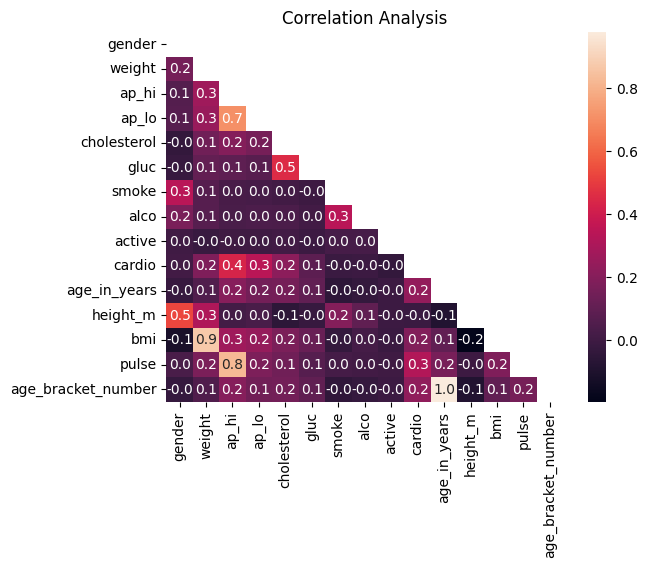

In [ ]:
#create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))

# This code creates a heatmap of the correlation matrix with annotations and the mask applied
plt.figure(dpi=100)
ax = plt.axes()
sns.heatmap(corr_matrix, annot=True, mask=mask, lw=0, linecolor='white', fmt="0.1f")
plt.title('Correlation Analysis')
plt.axis('tight')
plt.show()

In [ ]:
# Calculate the correlation between features and the target variable
correlation = df.corr()['cardio']
# Sort the correlation values in descending order
correlation = correlation.abs().sort_values(ascending=False)

# Print the correlation values
print(correlation)

cardio                1.000000
ap_hi                 0.428899
ap_lo                 0.342640
pulse                 0.320799
age_in_years          0.237908
age_bracket_number    0.228679
cholesterol           0.221084
bmi                   0.193205
weight                0.181270
gluc                  0.089124
active                0.036263
smoke                 0.015373
height_m              0.013389
gender                0.007813
alco                  0.007282
Name: cardio, dtype: float64


In [ ]:
# Saving the cleaned DataFrame as a CSV file
file_path = '/content/cardio_train.csv'
df_cleaned = df.to_csv(file_path, index=False)